## Sports / Games 2: Sports related: try to analyze the value of players. 

# Determine how to measure individual value, create a model, test on observations. 

**Cong Fu**

**CMSE202 - 002** 

**Instrctor: Claudio Kopper**

**For this topic, I will focus on analyzing the factors related to the value of the NBA player.**

**Assumption: First of all, I will make assumptions. I think the most influential factor for players should be PTS，eFG% and TRB.**

**data source: Kaggle and Basketball_reference.**

**Tool: Pandas, OLS, SNS**

In [1]:
import matplotlib.pylab as plt #Visualizing data
import pandas as pd # load the dataframe
import seaborn as sns # Provide more advanced and concise functions, and check the correlation by sns
import statsmodels.api as sm # show OLS result
import numpy as np # get the mean and median

## <1>. Sort and mask Data
 
 **I choose the average game data and salary of `NBA players from 2019 to 2020`. First, I filtered out the data with value of 0.**

### <1.1>.Load Data
 

In [2]:
nba = pd.read_csv("/home/fucong/CMSE202/NBA2019.csv") # Load data
nba = nba.dropna(0) # drop the 0 value
pd.set_option('max_columns', None) # show the all columns of the dataframe
nba.head(5) # show the ten rows of the data


,Rk,Player,salary,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,178,Aaron Gordon,19863636,PF,24,ORL,62,62,32.5,5.4,12.4,0.437,1.2,3.8,0.308,4.2,8.5,0.494,0.484,2.4,3.6,0.674,1.7,5.9,7.7,3.7,0.8,0.6,1.6,2.0,14.4
1,222,Aaron Holiday,2329200,PG,23,IND,66,33,24.5,3.5,8.5,0.414,1.3,3.3,0.394,2.2,5.2,0.427,0.491,1.1,1.3,0.851,0.3,2.0,2.4,3.4,0.8,0.2,1.3,1.8,9.5
2,362,Abdel Nader,1618520,SF,26,OKC,55,6,15.8,2.2,4.8,0.468,0.9,2.3,0.375,1.4,2.5,0.556,0.559,0.9,1.2,0.773,0.3,1.6,1.8,0.7,0.4,0.4,0.8,1.4,6.3
3,228,Al Horford,28000000,C,33,PHI,67,61,30.2,4.8,10.6,0.450,1.5,4.2,0.350,3.3,6.4,0.516,0.520,0.9,1.2,0.763,1.5,5.3,6.8,4.0,0.8,0.9,1.2,2.1,11.9
4,80,Alec Burks,1620564,SF,28,TOT,66,19,26.6,4.9,11.6,0.418,1.8,4.6,0.385,3.1,7.1,0.439,0.493,3.6,4.0,0.887,0.7,3.5,4.3,2.9,0.9,0.3,1.4,1.9,15.0


### <1.2>. Generate a New column based on the original column

**I create a `function` to generate a new column named `age_type` based on the original column. The `age_type` classifies the age of players according to young, old and best. If the age is less than or equal to `25`, it is `Young Age`, if it is greater than or equal to `30`, it is `Old Age`, and others are `Best Age`.**

In [3]:
# Create a function to generate the young, old and best category
def age_type(df):
    if df.Age<=25:
        'if the age in the column is lower and equal to 25, output young age '
        return 'Young Age'
    elif df.Age>=30:
        'if the age in the column is lower and equal to 25, output Old Age '
        return 'Old Age'
    else:
        'others is best'
        return 'Best Age'
nba['age_type']=nba.apply(lambda a: age_type(a),axis=1) # Geneate new column (lambda Defines an anonymous function)
nba.head(5)

,Rk,Player,salary,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,age_type
0,178,Aaron Gordon,19863636,PF,24,ORL,62,62,32.5,5.4,12.4,0.437,1.2,3.8,0.308,4.2,8.5,0.494,0.484,2.4,3.6,0.674,1.7,5.9,7.7,3.7,0.8,0.6,1.6,2.0,14.4,Young Age
1,222,Aaron Holiday,2329200,PG,23,IND,66,33,24.5,3.5,8.5,0.414,1.3,3.3,0.394,2.2,5.2,0.427,0.491,1.1,1.3,0.851,0.3,2.0,2.4,3.4,0.8,0.2,1.3,1.8,9.5,Young Age
2,362,Abdel Nader,1618520,SF,26,OKC,55,6,15.8,2.2,4.8,0.468,0.9,2.3,0.375,1.4,2.5,0.556,0.559,0.9,1.2,0.773,0.3,1.6,1.8,0.7,0.4,0.4,0.8,1.4,6.3,Best Age
3,228,Al Horford,28000000,C,33,PHI,67,61,30.2,4.8,10.6,0.450,1.5,4.2,0.350,3.3,6.4,0.516,0.520,0.9,1.2,0.763,1.5,5.3,6.8,4.0,0.8,0.9,1.2,2.1,11.9,Old Age
4,80,Alec Burks,1620564,SF,28,TOT,66,19,26.6,4.9,11.6,0.418,1.8,4.6,0.385,3.1,7.1,0.439,0.493,3.6,4.0,0.887,0.7,3.5,4.3,2.9,0.9,0.3,1.4,1.9,15.0,Best Age


### <1.3>.  Visualizing Data with `Old Age, Best Age and Young Age`

**I use the category of the `Old Age, Best Age and Young Age` to see the distribution of point (`Salary and PTS`).**

**Through the image, we can see that most `Young Age` players do not have a high `PTS`, but a few `Young Age` players have successfully achieved a high `PTS` with a lower `salary` or high `salary`.**

**For `best age` players, some players gradually increase their `salary` or `PTS`. There are also a few `best age` players who have achieved high `PTS` and `salary` at the same time.**

**Finally, for `old age` players, I think the overall scatter distribution is similar to that of `best age` players. But there are also very prominent `salary` and `PTS` among the old age players.**

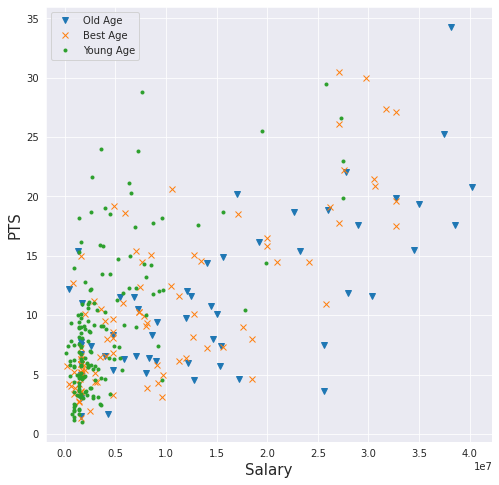

In [4]:
sns.set_style('darkgrid') # set style of plot
plt.figure(figsize=(8,8)) # set size of plot

x1=nba.loc[nba.age_type=='Old Age'].salary  # loc the data with Old_Age type salary
y1=nba.loc[nba.age_type=='Old Age'].PTS  # loc the data with Old_Age type PTS
x2=nba.loc[nba.age_type=='Best Age'].salary
y2=nba.loc[nba.age_type=='Best Age'].PTS
x3=nba.loc[nba.age_type=='Young Age'].salary
y3=nba.loc[nba.age_type=='Young Age'].PTS
plt.plot(x1,y1,'v') # In order to avoid overlapping points, I use three different markers to distinguish the data.
plt.plot(x2,y2,'x')
plt.plot(x3,y3,'.')

plt.xlabel('Salary',size=15) #label x_axis Salary
plt.ylabel('PTS',size=15) #label y_axis PTS
plt.legend(['Old Age','Best Age','Young Age']) # use the legend to classify

### <1.4>. Overview and get number of people who get high or low  `PTS ` and  `Salary `.

**In order to further prove our description of the image above, I first divide the overall data frame into three according to `old age, best age, and young age`. Then I set `PTS = 15` and `salary = 20000000` as the classification criteria to get the exact number of people. Finally, we will compare these numbers**

### <1.4.1>. `Old Age`

In [5]:
mask_o = nba['age_type'].isin(['Old Age']) #create make_o to just cover the type Old Age
Old_Age= nba[mask_o] # create a new dataframe named Old_Age
Old_Age.head(5) #show the first five rows

,Rk,Player,salary,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,age_type
3,228,Al Horford,28000000,C,33,PHI,67,61,30.2,4.8,10.6,0.450,1.5,4.2,0.350,3.3,6.4,0.516,0.520,0.9,1.2,0.763,1.5,5.3,6.8,4.0,0.8,0.9,1.2,2.1,11.9,Old Age
13,237,Andre Iguodala,17185185,SF,36,MIA,21,0,19.9,1.8,4.2,0.432,0.7,2.2,0.298,1.1,2.0,0.585,0.511,0.3,0.7,0.400,0.8,2.9,3.7,2.4,0.7,1.0,1.2,1.7,4.6,Old Age
16,32,Aron Baynes,5453280,C,33,PHO,42,28,22.2,4.4,9.1,0.480,1.4,4.0,0.351,3.0,5.1,0.582,0.558,1.3,1.8,0.747,1.7,4.0,5.6,1.6,0.2,0.5,1.2,3.4,11.5,Old Age
21,190,Blake Griffin,34449964,PF,30,DET,18,18,28.4,4.9,13.9,0.352,1.5,6.2,0.243,3.4,7.7,0.439,0.406,4.2,5.4,0.776,0.9,3.7,4.7,3.3,0.4,0.4,2.2,1.5,15.5,Old Age
23,49,Bojan Bogdanović,17000000,SF,30,UTA,63,63,33.1,6.6,14.8,0.447,3.0,7.3,0.414,3.6,7.6,0.479,0.548,4.0,4.4,0.903,0.6,3.5,4.1,2.1,0.5,0.1,2.5,1.7,20.2,Old Age


In [6]:
print(Old_Age.loc[Old_Age['PTS'].idxmax()]) # print the Old_Age player information who get the highest PTS 
print(Old_Age.loc[Old_Age['salary'].idxmax()]) # print the Old_Age player information who get the highest salary

Rk                   198
Player      James Harden
salary          38199000
Pos                   SG
Age                   30
Tm                   HOU
G                     68
GS                    68
MP                  36.5
FG                   9.9
FGA                 22.3
FG%                0.444
3P                   4.4
3PA                 12.4
3P%                0.355
2P                   5.5
2PA                  9.9
2P%                0.556
eFG%               0.543
FT                  10.2
FTA                 11.8
FT%                0.865
ORB                  1.0
DRB                  5.5
TRB                  6.6
AST                  7.5
STL                  1.8
BLK                  0.9
TOV                  4.5
PF                   3.3
PTS                 34.3
age_type         Old Age
Name: 137, dtype: object
Rk                    121
Player      Stephen Curry
salary           40231758
Pos                    PG
Age                    31
Tm                    GSW
G                  

In [7]:
Old_Age.describe() # overview the data

,Rk,salary,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,57.000000,5.700000e+01,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,199.491228,1.450066e+07,32.596491,49.192982,27.912281,23.415789,3.864912,8.615789,0.446895,1.368421,3.859649,0.353526,2.500000,4.752632,0.516474,0.529368,1.933333,2.392982,0.785982,0.826316,3.407018,4.236842,2.542105,0.710526,0.478947,1.363158,1.945614,11.021053
std,112.897413,1.178865e+07,2.455749,20.279686,27.489791,7.264955,2.113857,4.526540,0.069995,0.853597,2.406083,0.080872,1.756518,3.246927,0.084555,0.060894,1.958620,2.266909,0.116507,0.588438,1.655387,2.028074,2.188684,0.385303,0.437826,0.906057,0.719392,6.462439
min,3.000000,4.394750e+05,30.000000,3.000000,0.000000,8.100000,0.500000,1.300000,0.322000,0.000000,0.100000,0.000000,0.100000,0.400000,0.333000,0.400000,0.000000,0.000000,0.400000,0.100000,0.300000,0.700000,0.000000,0.000000,0.000000,0.200000,0.000000,1.500000
25%,121.000000,4.767000e+06,31.000000,36.000000,2.000000,16.600000,2.200000,5.100000,0.404000,0.900000,2.400000,0.317000,1.100000,2.200000,0.472000,0.498000,0.700000,0.800000,0.750000,0.400000,2.000000,2.500000,1.200000,0.400000,0.200000,0.800000,1.500000,6.300000
50%,208.000000,1.219512e+07,32.000000,58.000000,16.000000,24.300000,3.300000,7.800000,0.438000,1.300000,3.500000,0.356000,2.300000,4.400000,0.519000,0.532000,1.300000,1.600000,0.816000,0.600000,3.500000,4.100000,1.600000,0.700000,0.400000,1.200000,1.900000,9.800000
75%,301.000000,2.327160e+07,34.000000,66.000000,58.000000,28.400000,5.400000,12.300000,0.481000,1.700000,4.500000,0.389000,3.200000,6.200000,0.554000,0.552000,2.800000,3.200000,0.857000,1.000000,4.500000,5.600000,3.300000,0.900000,0.600000,1.700000,2.400000,15.400000
max,396.000000,4.023176e+07,43.000000,73.000000,70.000000,36.500000,9.900000,22.300000,0.729000,4.400000,12.400000,0.600000,8.100000,14.900000,0.800000,0.735000,10.200000,11.800000,1.000000,2.500000,8.800000,9.800000,10.200000,1.800000,2.400000,4.500000,3.400000,34.300000


In [8]:
print(Old_Age[Old_Age['PTS'] >15].shape[0])  # get the number of Old_Age players who PTS is higher than 15
print(Old_Age[Old_Age['salary'] >20000000].shape[0]) # get the number of Old_Age players who salary is higher than 20000000
print(Old_Age[(Old_Age['salary'] >20000000)&(Old_Age['PTS'] >15)].shape[0]) # get the number of Old_Age players who reach the both.

15
16
12


In [9]:
print(Old_Age[Old_Age['PTS'] <=15].shape[0])  # get the number of Old_Age players who PTS is lower than 15
print(Old_Age[Old_Age['salary'] <=20000000].shape[0]) # get the number of Old_Age players who salary is lower than 20000000
print(Old_Age[(Old_Age['salary'] <=20000000)&(Old_Age['PTS'] <=15)].shape[0]) # get the number of Old_Age players who reach the both.

42
41
38


### <1.4.2>. `Young Age`

In [10]:
mask_y= nba['age_type'].isin(['Young Age']) #create make_o to just cover the type Young_Age
Young_Age= nba[mask_y]  # create a new dataframe named young_age
Young_Age.head(5)

,Rk,Player,salary,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,age_type
0,178,Aaron Gordon,19863636,PF,24,ORL,62,62,32.5,5.4,12.4,0.437,1.2,3.8,0.308,4.2,8.5,0.494,0.484,2.4,3.6,0.674,1.7,5.9,7.7,3.7,0.8,0.6,1.6,2.0,14.4,Young Age
1,222,Aaron Holiday,2329200,PG,23,IND,66,33,24.5,3.5,8.5,0.414,1.3,3.3,0.394,2.2,5.2,0.427,0.491,1.1,1.3,0.851,0.3,2.0,2.4,3.4,0.8,0.2,1.3,1.8,9.5,Young Age
5,93,Alex Caruso,2750000,PG,25,LAL,64,2,18.4,1.9,4.5,0.412,0.6,1.9,0.333,1.3,2.7,0.468,0.481,1.1,1.5,0.734,0.3,1.7,1.9,1.9,1.1,0.3,0.8,1.5,5.5,Young Age
9,254,Alize Johnson,1416852,PF,23,IND,17,1,6.9,0.7,1.7,0.414,0.2,0.5,0.375,0.5,1.2,0.429,0.466,0.4,0.6,0.700,0.9,1.9,2.8,0.4,0.2,0.1,0.4,0.7,2.0,Young Age
15,393,Anžejs Pasečņiks,482144,C,24,WAS,27,0,16.2,2.3,4.3,0.526,0.0,0.1,0.000,2.3,4.2,0.540,0.526,1.3,2.1,0.586,1.6,2.4,4.0,0.7,0.3,0.4,0.9,2.8,5.8,Young Age


In [11]:
print(Young_Age.loc[Young_Age['PTS'].idxmax()]) # print the Young_Age player information who get the highest PTS 
print(Young_Age.loc[Young_Age['salary'].idxmax()]) # print the Young_Age player information who get the highest salary

Rk                             13
Player      Giannis Antetokounmpo
salary                   25842697
Pos                            PF
Age                            25
Tm                            MIL
G                              63
GS                             63
MP                           30.4
FG                           10.9
FGA                          19.7
FG%                         0.553
3P                            1.4
3PA                           4.7
3P%                         0.304
2P                            9.5
2PA                          15.0
2P%                         0.631
eFG%                        0.589
FT                            6.3
FTA                          10.0
FT%                         0.633
ORB                           2.2
DRB                          11.4
TRB                          13.6
AST                           5.6
STL                           1.0
BLK                           1.0
TOV                           3.7
PF            

In [12]:
Young_Age.describe()

,Rk,salary,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,160.00000,1.600000e+02,160.000000,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.00000,160.000000,160.000000,160.00000,160.000000,160.00000,160.000000,160.000000
mean,213.43125,4.056303e+06,22.431250,46.46875,20.743750,20.171875,3.360625,7.308750,0.457263,0.864375,2.535000,0.307025,2.49375,4.779375,0.519319,0.514444,1.444375,1.921250,0.742862,0.869375,2.86250,3.730625,1.955000,0.68375,0.406250,1.19875,1.842500,9.013750
std,118.95555,5.004107e+06,1.746954,18.90490,23.591451,8.642939,2.185403,4.522166,0.078203,0.731703,1.914434,0.120191,1.82518,3.331536,0.087961,0.068106,1.305275,1.684386,0.122622,0.683498,1.82049,2.380608,1.704777,0.39888,0.387329,0.81279,0.821301,6.006218
min,2.00000,1.556470e+05,19.000000,4.00000,0.000000,3.200000,0.400000,0.800000,0.273000,0.000000,0.000000,0.000000,0.40000,0.500000,0.333000,0.295000,0.000000,0.200000,0.000000,0.000000,0.30000,0.300000,0.000000,0.00000,0.000000,0.20000,0.300000,1.000000
25%,107.25000,1.416852e+06,21.000000,33.00000,1.000000,13.100000,1.775000,3.875000,0.409750,0.300000,1.100000,0.269250,1.20000,2.300000,0.464000,0.476000,0.600000,0.800000,0.678250,0.400000,1.67500,2.100000,0.800000,0.40000,0.200000,0.60000,1.200000,4.700000
50%,227.00000,2.325468e+06,22.500000,51.50000,9.000000,19.250000,2.850000,6.150000,0.442500,0.700000,2.200000,0.332000,2.10000,3.900000,0.510500,0.514000,1.000000,1.400000,0.750000,0.700000,2.45000,3.300000,1.400000,0.60000,0.300000,1.00000,1.800000,7.400000
75%,310.25000,4.449616e+06,24.000000,61.00000,36.000000,27.700000,4.425000,9.725000,0.481250,1.200000,3.500000,0.367250,3.02500,6.100000,0.564000,0.550500,1.725000,2.300000,0.814000,1.100000,3.52500,4.600000,2.325000,1.00000,0.500000,1.50000,2.300000,11.925000
max,407.00000,2.750463e+07,25.000000,73.00000,73.000000,35.900000,10.900000,20.600000,0.684000,3.500000,9.300000,1.000000,9.50000,15.000000,1.000000,0.686000,7.000000,10.000000,1.000000,3.900000,11.40000,13.600000,8.800000,2.00000,2.300000,4.30000,4.900000,29.500000


In [13]:
print(Young_Age[Young_Age['PTS'] >15].shape[0]) # get the number of young_Age players who PTS is higher than 15
print(Young_Age[Young_Age['salary'] >20000000].shape[0])
print(Young_Age[(Young_Age['salary'] >20000000)&(Young_Age['PTS'] >15)].shape[0])

24
4
4


In [14]:
print(Young_Age[Young_Age['PTS'] <=15].shape[0])
print(Young_Age[Young_Age['salary'] <=20000000].shape[0])
print(Young_Age[(Young_Age['salary'] <=20000000)&(Young_Age['PTS'] <=15)].shape[0])

136
156
136


### <1.4.3>. `Best Age`

In [15]:
mask_b = nba['age_type'].isin(['Best Age']) # create a mask which only include the Best age in age type column.
Best_Age= nba[mask_b] # create a new date frame by the mask_b
Best_Age.head(5)

,Rk,Player,salary,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,age_type
2,362,Abdel Nader,1618520,SF,26,OKC,55,6,15.8,2.2,4.8,0.468,0.9,2.3,0.375,1.4,2.5,0.556,0.559,0.9,1.2,0.773,0.3,1.6,1.8,0.7,0.4,0.4,0.8,1.4,6.3,Best Age
4,80,Alec Burks,1620564,SF,28,TOT,66,19,26.6,4.9,11.6,0.418,1.8,4.6,0.385,3.1,7.1,0.439,0.493,3.6,4.0,0.887,0.7,3.5,4.3,2.9,0.9,0.3,1.4,1.9,15.0,Best Age
6,293,Alex Len,4160000,C,26,TOT,55,12,17.6,3.2,5.8,0.555,0.3,1.1,0.271,2.9,4.7,0.619,0.580,1.2,1.9,0.648,1.8,4.0,5.8,0.9,0.4,0.9,1.0,2.3,8.0,Best Age
7,9,Al-Farouq Aminu,9258000,PF,29,ORL,18,2,21.1,1.4,4.8,0.291,0.5,2.0,0.250,0.9,2.8,0.320,0.343,1.1,1.6,0.655,1.3,3.5,4.8,1.2,1.0,0.4,0.9,1.5,4.3,Best Age
8,329,Alfonzo McKinnie,1500000,SF,27,CLE,40,1,14.8,1.8,4.3,0.427,0.4,1.6,0.215,1.5,2.7,0.557,0.468,0.6,0.8,0.710,0.9,1.9,2.8,0.4,0.6,0.2,0.7,1.8,4.6,Best Age


In [16]:
print(Best_Age.loc[Best_Age['PTS'].idxmax()]) # print the Best_Age player information who get the highest PTS 
print(Best_Age.loc[Best_Age['salary'].idxmax()]) # print the Best_Age player information who get the highest salary

Rk                    35
Player      Bradley Beal
salary          27093019
Pos                   SG
Age                   26
Tm                   WAS
G                     57
GS                    57
MP                  36.0
FG                  10.4
FGA                 22.9
FG%                0.455
3P                   3.0
3PA                  8.4
3P%                0.353
2P                   7.4
2PA                 14.4
2P%                0.515
eFG%                0.52
FT                   6.8
FTA                  8.0
FT%                0.842
ORB                  0.9
DRB                  3.3
TRB                  4.2
AST                  6.1
STL                  1.2
BLK                  0.4
TOV                  3.4
PF                   2.2
PTS                 30.5
age_type        Best Age
Name: 24, dtype: object
Rk                    294
Player      Kawhi Leonard
salary           32742000
Pos                    SF
Age                    28
Tm                    LAC
G                   

In [17]:
Best_Age.describe()

,Rk,salary,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,92.000000,9.200000e+01,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,201.532609,9.831182e+06,27.336957,50.326087,24.336957,22.373913,3.755435,8.232609,0.453685,1.256522,3.441304,0.323652,2.505435,4.794565,0.521913,0.527848,1.568478,1.997826,0.751554,0.914130,3.146739,4.058696,2.236957,0.697826,0.420652,1.196739,1.846739,10.330435
std,114.109399,9.717093e+06,1.121980,17.186826,24.625671,8.283134,2.382785,5.036092,0.062167,0.985868,2.449631,0.106649,1.877417,3.539521,0.069348,0.056545,1.529198,1.796271,0.114625,0.771837,1.786362,2.375986,1.708525,0.388567,0.410451,0.748545,0.605007,6.797410
min,1.000000,1.831150e+05,26.000000,12.000000,0.000000,5.800000,0.400000,1.000000,0.291000,0.000000,0.000000,0.000000,0.100000,0.300000,0.250000,0.343000,0.100000,0.300000,0.375000,0.100000,0.500000,0.600000,0.300000,0.000000,0.000000,0.100000,0.600000,1.300000
25%,114.750000,1.645357e+06,26.000000,39.000000,2.000000,15.750000,1.975000,4.600000,0.419500,0.400000,1.575000,0.293000,1.200000,2.400000,0.484500,0.499500,0.600000,0.800000,0.677500,0.400000,1.875000,2.300000,1.000000,0.400000,0.200000,0.700000,1.475000,5.175000
50%,192.500000,6.500000e+06,27.000000,54.500000,16.500000,21.950000,3.200000,6.650000,0.451000,1.150000,3.200000,0.353000,1.700000,3.200000,0.520500,0.532000,1.100000,1.400000,0.778000,0.700000,2.950000,3.950000,1.700000,0.600000,0.300000,1.000000,1.900000,8.150000
75%,294.250000,1.358840e+07,28.000000,64.000000,48.250000,29.500000,5.025000,11.325000,0.486500,1.900000,5.050000,0.386250,3.250000,6.525000,0.560000,0.560250,1.925000,2.525000,0.833750,1.100000,3.925000,5.125000,2.900000,0.900000,0.500000,1.425000,2.300000,14.525000
max,404.000000,3.274200e+07,29.000000,74.000000,72.000000,37.500000,10.400000,22.900000,0.630000,4.100000,10.200000,0.500000,7.700000,14.400000,0.656000,0.630000,7.200000,8.500000,0.922000,4.600000,11.200000,15.800000,8.000000,2.000000,2.300000,3.600000,3.600000,30.500000


In [18]:
print(Best_Age[Best_Age['PTS'] >15].shape[0]) # get the number of best_Age players who PTS is higher than 15
print(Best_Age[Best_Age['salary'] >20000000].shape[0])
print(Best_Age[(Best_Age['salary'] >20000000)&(Best_Age['PTS'] >15)].shape[0])

21
16
13


In [19]:
print(Best_Age[Best_Age['PTS'] <=15].shape[0])
print(Best_Age[Best_Age['salary'] <=20000000].shape[0])
print(Best_Age[(Best_Age['salary'] <=20000000)&(Best_Age['PTS'] <=15)].shape[0])

71
76
68


## Summary from above

**Number of Best_Age: 92**

Mean Best_Age PTS : `10.330435`

Mean Best_Age Salary: `9.831182e+06`

Best_Age PTS higher than 15 : `21`     (lower than and equal :`71`

Best_Age salary higher than 20000000 : `16`  (lower than and equal:`76`

Both higher than:`13`   (lower than and equal :`68`

`Bradley Beal` is the highest `PTS 30.5 (Salary 27093019)`

`Kawhi Leonard `is the highest `salary 32742000 (PTS:27.1)`

**Number of Young_Age: 160**

Mean Young_Age PTS : `9.013750`

Mean Young_Age Salary: `4.056303e+06`

Young_Age PTS higher than15 : `24`     (lower than and equal: `136`

Young_Age salary higher than 20000000 : `4` (lower than and equal :`136`

Both higher than:`4 `  (lower than and equal:`136`

`Giannis Antetokounmpo` is the highest `PTS 29.5 (Salary 25842697)`

`Joel Embiid `is the highest `salary 27504630 (PTS:23.0)`


**Number of Old_Age: 57**

Mean Old_Age PTS : `11.021053`

Mean Old_Age Salary: `1.450066e+07`

Old_Age PTS  higher than 15 : `15 `    (lower than and equal: `42`

Old_Age salary higher than 20000000 : `16` (lower than and equal :`41`

Both higher than:`12`   (lower than and equal :`38`

`James Harden` is the highest `PTS 34.3 (Salary 38199000)`

`Stephen Curry `is the highest `salary 40231758 (PTS:20.8)`

**From the above data and summary, `Young_ Age` has the `largest number of players`, followed by `best_ Age` player, and finally `Old_ Age'`s players.**

**`Old_ Age` has the` highest average PTS and salary`, followed by `best_ Age and young_ Age`'s players. This proves that `old_ Age's players` perform better on these two data than the other two types.**

## <1.5>.  Delete columns

**Because there are too many columns in this dataframe, I will sort out this and leave some intuitive and useful data.**

**`Remove the Rank, Team, Free Throws, Free Throws Attempts,Games Started,Field Goal Attempts, Field Goal, 3-Point Field Goals，2-Point Field Goals and age_type.`**

**I delete some data about the number of shots because I think we should pay more attention to the `rate(goal/number)`**

In [20]:
del nba['Rk'] # delete some columns
del nba['Tm']
del nba['FT']
del nba['FTA']
del nba['GS']
del nba['FG']
del nba['FGA']
del nba['3P']
del nba['3PA']
del nba['2P']
del nba['2PA']
del nba['age_type']



## <1.2>. Mask Data

**After filtering, the dataframe is still a little messy. So, I will divide the data into 5 by `PG, SG, SF, PF and C`.**

In [21]:
mask4 = nba['Pos'].isin(['PG']) # create the mask which only contain the PG type
PG= nba[mask4]  #Create a new dataframe called PG
PG.head(5)

,Player,salary,Pos,Age,G,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Aaron Holiday,2329200,PG,23,66,24.5,0.414,0.394,0.427,0.491,0.851,0.3,2.0,2.4,3.4,0.8,0.2,1.3,1.8,9.5
5,Alex Caruso,2750000,PG,25,64,18.4,0.412,0.333,0.468,0.481,0.734,0.3,1.7,1.9,1.9,1.1,0.3,0.8,1.5,5.5
26,Brandon Goodwin,522738,PG,24,34,12.6,0.400,0.299,0.485,0.468,0.933,0.3,1.8,2.1,1.5,0.4,0.1,0.9,1.3,6.1
31,Bruce Brown,1416852,PG,23,58,28.2,0.443,0.344,0.470,0.480,0.739,1.1,3.7,4.7,4.0,1.1,0.5,1.7,2.8,8.9
50,Chris Paul,38506482,PG,34,70,31.5,0.489,0.365,0.554,0.552,0.907,0.4,4.6,5.0,6.7,1.6,0.2,2.3,2.3,17.6


In [22]:
mask2 = nba['Pos'].isin(['SG']) # create the mask which only contain the SG type
SG= nba[mask2] #Create a new dataframe called SG
SG.head(5)

,Player,salary,Pos,Age,G,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
10,Allen Crabbe,18500000,SG,27,37,17.6,0.356,0.303,0.466,0.458,0.714,0.3,1.8,2.1,0.9,0.4,0.1,0.5,1.3,4.6
17,Avery Bradley,4767000,SG,29,49,24.2,0.444,0.364,0.510,0.526,0.833,0.4,2.0,2.3,1.3,0.9,0.1,1.0,2.2,8.6
22,Bogdan Bogdanović,8529386,SG,27,61,29.0,0.440,0.372,0.532,0.547,0.741,0.4,3.0,3.4,3.4,1.0,0.2,1.7,2.2,15.1
24,Bradley Beal,27093019,SG,26,57,36.0,0.455,0.353,0.515,0.520,0.842,0.9,3.3,4.2,6.1,1.2,0.4,3.4,2.2,30.5
28,Brandon Knight,15643750,SG,28,25,18.5,0.353,0.344,0.389,0.488,0.588,0.2,1.5,1.6,2.8,0.4,0.1,1.5,1.6,7.3


In [23]:
mask = nba['Pos'].isin(['SF']) # create the mask which only contain the SF type
SF = nba[mask] #Create a new dataframe called SF
SF.head(5)

,Player,salary,Pos,Age,G,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
2,Abdel Nader,1618520,SF,26,55,15.8,0.468,0.375,0.556,0.559,0.773,0.3,1.6,1.8,0.7,0.4,0.4,0.8,1.4,6.3
4,Alec Burks,1620564,SF,28,66,26.6,0.418,0.385,0.439,0.493,0.887,0.7,3.5,4.3,2.9,0.9,0.3,1.4,1.9,15.0
8,Alfonzo McKinnie,1500000,SF,27,40,14.8,0.427,0.215,0.557,0.468,0.710,0.9,1.9,2.8,0.4,0.6,0.2,0.7,1.8,4.6
13,Andre Iguodala,17185185,SF,36,21,19.9,0.432,0.298,0.585,0.511,0.400,0.8,2.9,3.7,2.4,0.7,1.0,1.2,1.7,4.6
19,Ben McLemore,2028594,SF,26,71,22.8,0.444,0.400,0.656,0.610,0.746,0.3,1.9,2.2,0.8,0.6,0.2,0.7,2.2,10.1


In [24]:
mask3 = nba['Pos'].isin(['PF'])# create the mask which only contain the PF type
PF= nba[mask3] #Create a new dataframe called PF
PF.head(5)

,Player,salary,Pos,Age,G,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Aaron Gordon,19863636,PF,24,62,32.5,0.437,0.308,0.494,0.484,0.674,1.7,5.9,7.7,3.7,0.8,0.6,1.6,2.0,14.4
7,Al-Farouq Aminu,9258000,PF,29,18,21.1,0.291,0.250,0.320,0.343,0.655,1.3,3.5,4.8,1.2,1.0,0.4,0.9,1.5,4.3
9,Alize Johnson,1416852,PF,23,17,6.9,0.414,0.375,0.429,0.466,0.700,0.9,1.9,2.8,0.4,0.2,0.1,0.4,0.7,2.0
14,Anthony Davis,27093018,PF,26,62,34.4,0.503,0.330,0.546,0.536,0.846,2.3,7.0,9.3,3.2,1.5,2.3,2.5,2.5,26.1
18,Bam Adebayo,3454080,PF,22,72,33.6,0.557,0.143,0.564,0.558,0.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9


In [25]:
mask1 = nba['Pos'].isin(['C'])# create the mask which only contain the C type
C= nba[mask1] #Create a new dataframe called C
C.head(5)

,Player,salary,Pos,Age,G,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3,Al Horford,28000000,C,33,67,30.2,0.450,0.350,0.516,0.520,0.763,1.5,5.3,6.8,4.0,0.8,0.9,1.2,2.1,11.9
6,Alex Len,4160000,C,26,55,17.6,0.555,0.271,0.619,0.580,0.648,1.8,4.0,5.8,0.9,0.4,0.9,1.0,2.3,8.0
12,Andre Drummond,27093019,C,26,49,33.8,0.530,0.048,0.546,0.531,0.584,4.6,11.2,15.8,2.8,2.0,1.7,3.6,3.6,17.8
15,Anžejs Pasečņiks,482144,C,24,27,16.2,0.526,0.000,0.540,0.526,0.586,1.6,2.4,4.0,0.7,0.3,0.4,0.9,2.8,5.8
16,Aron Baynes,5453280,C,33,42,22.2,0.480,0.351,0.582,0.558,0.747,1.7,4.0,5.6,1.6,0.2,0.5,1.2,3.4,11.5


## <2>.Overview Data

**Describe function to overview the data, and `observe the range of this series of data, size, fluctuation trend, etc`** 

In [26]:
nba.describe()

,salary,Age,G,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,3.090000e+02,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,7.702313e+06,25.766990,48.119741,21.425890,0.454285,0.320553,0.519566,0.521188,0.753405,0.874757,3.047573,3.921683,2.147249,0.692880,0.423948,1.228479,1.862783,9.776052
std,9.105205e+06,4.265241,18.698442,8.381441,0.072143,0.110933,0.081966,0.063739,0.119863,0.693577,1.787902,2.320424,1.812233,0.392231,0.403486,0.812383,0.742980,6.367746
min,1.556470e+05,19.000000,3.000000,3.200000,0.273000,0.000000,0.250000,0.295000,0.000000,0.000000,0.300000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000,1.000000
25%,1.620564e+06,22.000000,34.000000,14.900000,0.414000,0.286000,0.471000,0.483000,0.694000,0.400000,1.800000,2.200000,0.900000,0.400000,0.200000,0.700000,1.400000,5.100000
50%,3.569643e+06,25.000000,55.000000,21.300000,0.444000,0.344000,0.516000,0.524000,0.773000,0.700000,2.700000,3.500000,1.600000,0.600000,0.300000,1.000000,1.900000,8.000000
75%,9.346153e+06,29.000000,63.000000,28.900000,0.482000,0.380000,0.558000,0.556000,0.833000,1.100000,3.900000,4.900000,2.800000,0.900000,0.500000,1.500000,2.300000,12.700000
max,4.023176e+07,43.000000,74.000000,37.500000,0.729000,1.000000,1.000000,0.735000,1.000000,4.600000,11.400000,15.800000,10.200000,2.000000,2.400000,4.500000,4.900000,34.300000


**As can be seen from the above description, in NBA dataframe, the `average age` of `309` NBA players is `25.7669`, the `average salary` is `7.702313e + 06` and the `average PTS` is `9.776052`. This shows that the overall level of players' age is `young_ Age or best_ Age`.**

**For `PTS and salary`, although some players can obtain very high data, the overall level still remains at `PTS 9.7 and salary 7.702313e + 06.`**

### <2.1>. Overview of `NBA salary`, `age` and `FG%`by Plot

**In these three plots, `FG% `looks similar to `normal distribution`, while `salary and age` look similar to `positive skewness distribution`. For `positive skewness distribution`, it means that there is a `maximum` in the data, which will pull the `average` towards the `maximum` (`median < average`)**

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Text(0, 0.5, 'FG%')

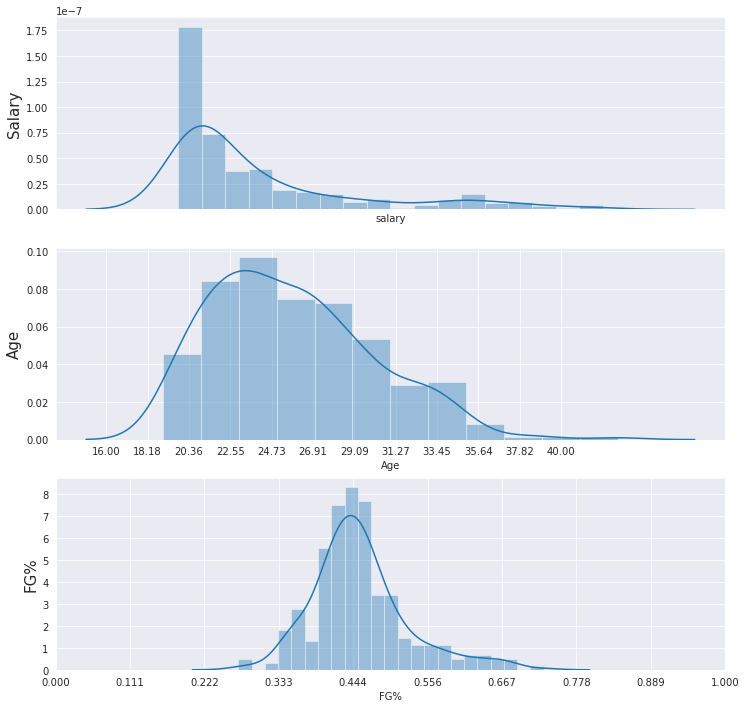

In [27]:
sns.set_style('darkgrid')  # Set style
plt.figure(figsize=(12,12)) # set size 
plt.subplot(3,1,1) #plot 1 
sns.distplot(nba['salary']) # salary value 
plt.xticks(np.linspace(20,100,0))
plt.ylabel('Salary',size=15)

plt.subplot(3,1,2) # plot 2
sns.distplot(nba['Age'])
plt.xticks(np.linspace(16,40,12))
plt.ylabel('Age',size=15)

plt.subplot(3,1,3) # plot 2
sns.distplot(nba['FG%'])
plt.xticks(np.linspace(0,1,10))
plt.ylabel('FG%',size=15)


## <2.1.1>. Prove the `Positive skewness distribution` or `Normal distribution`

**For the `normal distribution`, it is a single peak symmetric distribution, so the `median`, `mean` and `mode parameters` are located in the center of symmetry, and the three are equal. `The positive skew distribution`, as I explained above, the `average value` will be greater than the `median`. Therefore, through the `average` and `median` of the three, we can see that they all belong to `positive skew distribution.`**

In [28]:
print(np.mean(nba['salary'])) # print mean of the salary column in nba dateframe
print(np.median(nba['salary'])) # print median of the salary column in nba dateframe

7702313.2783171525
3569643.0


In [29]:
print(np.mean(nba['FG%']))
print(np.median(nba['FG%']))

0.45428478964401303
0.444


In [30]:
print(np.mean(nba['Age']))
print(np.median(nba['Age']))

25.766990291262136
25.0


## <2.2>. Find the  `factor ` which is most related with the ` Salary `

## <2.2.1>. corr and salary

**From Positions C data, we can see the factor which is most positive related with salary is `PTS(0.6577), TOV(0.6198), AST(0.5969) and MP(0.5824)`by using corr and heatmap.**

In [31]:
nba.corr() # show the correlation between these factors

,salary,Age,G,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
salary,1.000000,0.412130,0.175623,0.582499,0.051914,0.079573,0.027849,0.062836,0.188559,0.236667,0.547068,0.491995,0.596933,0.441293,0.253311,0.619806,0.324064,0.657782
Age,0.412130,1.000000,0.057711,0.134512,-0.054240,0.181338,-0.032395,0.108338,0.117177,-0.020652,0.120074,0.085903,0.129793,0.045000,0.053625,0.043899,0.052682,0.096575
G,0.175623,0.057711,1.000000,0.507911,0.146601,0.278638,0.032323,0.272389,0.186474,0.132770,0.316929,0.284661,0.334138,0.284369,0.119168,0.313458,0.297150,0.390482
MP,0.582499,0.134512,0.507911,1.000000,0.074461,0.218851,-0.011519,0.162091,0.308358,0.328727,0.702451,0.638788,0.681477,0.699635,0.323992,0.772735,0.689512,0.860431
FG%,0.051914,-0.054240,0.146601,0.074461,1.000000,-0.069433,0.767741,0.837902,-0.230847,0.551695,0.314863,0.405768,-0.018043,0.025774,0.398729,0.103024,0.292421,0.152829
3P%,0.079573,0.181338,0.278638,0.218851,-0.069433,1.000000,-0.253460,0.282065,0.296565,-0.230494,0.031811,-0.043970,0.106061,0.082701,-0.081284,0.068503,0.098782,0.195910
2P%,0.027849,-0.032395,0.032323,-0.011519,0.767741,-0.253460,1.000000,0.641632,-0.292242,0.346699,0.184872,0.245364,-0.087178,-0.013780,0.317076,0.010343,0.196339,0.049009
eFG%,0.062836,0.108338,0.272389,0.162091,0.837902,0.282065,0.641632,1.000000,-0.057822,0.309663,0.254531,0.287648,-0.024492,0.025222,0.275167,0.061916,0.288408,0.195376
FT%,0.188559,0.117177,0.186474,0.308358,-0.230847,0.296565,-0.292242,-0.057822,1.000000,-0.163327,0.084238,0.017691,0.252198,0.126737,-0.090609,0.199865,0.112455,0.323230
ORB,0.236667,-0.020652,0.132770,0.328727,0.551695,-0.230494,0.346699,0.309663,-0.163327,1.000000,0.692085,0.830512,0.068681,0.225978,0.675072,0.301956,0.529306,0.295837


<AxesSubplot:>

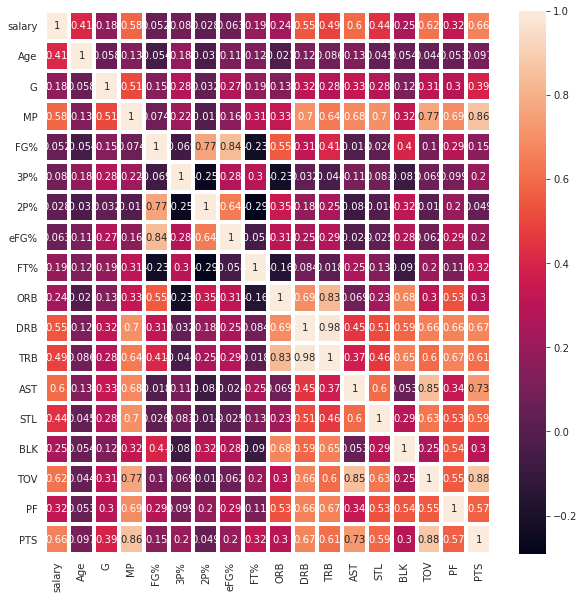

In [32]:
fig, ax = plt.subplots(figsize=(10,10))       # Set size 
sns.heatmap(nba.corr(), annot=True,linewidths=3,ax=ax) # make the heatmap

## <2.3>. Use pairplot to check the positive relationship and scatter distribution between  `Salary ` and `PTS,TOV,AST,MP`


**I want to observe how `salary` is related to these `factors`. So I chose to use pairplot to observe the `scatter distribution` between the data. We can see from the images that `PTS, TOV and AST` show a certain `positive` correlation,`(For example, player can get higher salary while getting higher data.)` while `MP` is also `positive` correlation, but it is the `weakest`, because most scatter points are still below.**

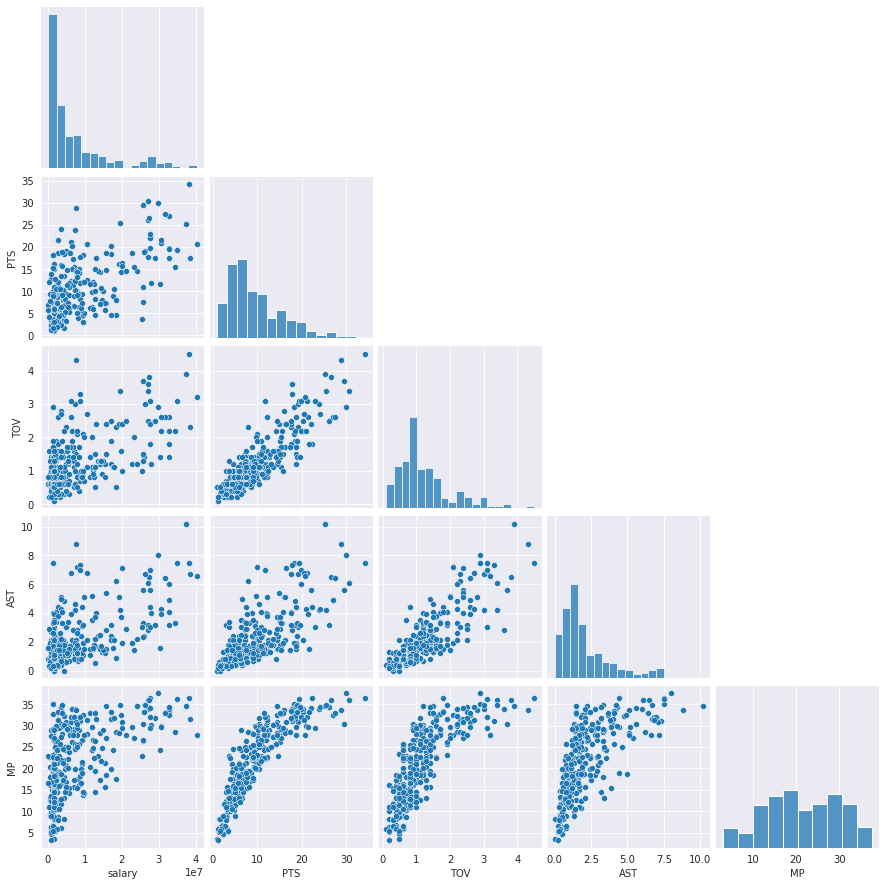

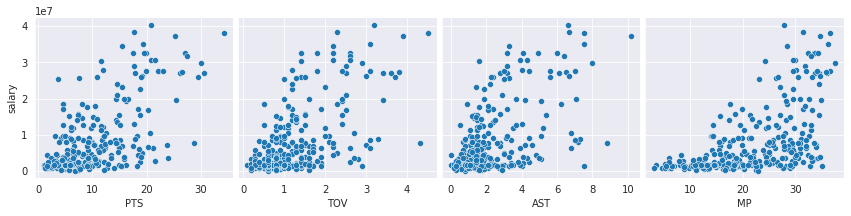

In [33]:
factor_related=nba[['salary','PTS','TOV','AST','MP']] # Create a new dateframe called factor_related with salary, PTS, TOV, AST and MP

sns.pairplot(factor_related,corner=True) # make the graph 

sns.pairplot(factor_related,x_vars=['PTS','TOV','AST','MP'],y_vars=['salary'],height=3) # set the salary as the dependent variable

## <3>. Classified discussion

**I don't think we can determine the impact of some factors on salary only through the  `overall data `. So I will discuss different  `classifications ` through five positions.**

## <3.1>. Classified discussion of Positions C

**From Positions C data, we can see the factor which is most positive related with salary is `AST(0.7497), DRB(0.7279), MP(0.7122), TRB(0.6737), PTS(0.6527) and STL(0.6291)`by using corr and heatmap.**

In [34]:
C.corr() # show the correlation among the data of C position

,salary,Age,G,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
salary,1.000000,0.333949,0.316287,0.712207,-0.159809,0.060495,-0.212659,-0.119853,0.118677,0.439667,0.727960,0.673786,0.749763,0.629167,0.402602,0.709837,0.427409,0.652721
Age,0.333949,1.000000,0.116491,0.202937,-0.170881,0.227319,-0.087767,-0.061971,0.009411,-0.072456,0.144007,0.080003,0.169030,0.106685,0.089484,0.012589,0.089739,0.061005
G,0.316287,0.116491,1.000000,0.356406,0.269180,0.212524,0.109937,0.351425,0.022047,0.276818,0.282973,0.298050,0.252178,0.171949,0.330775,0.249938,0.246546,0.297579
MP,0.712207,0.202937,0.356406,1.000000,-0.041674,-0.004539,-0.085715,0.015522,0.238292,0.646334,0.863382,0.840160,0.691136,0.750893,0.677013,0.786715,0.790533,0.894224
FG%,-0.159809,-0.170881,0.269180,-0.041674,1.000000,-0.095887,0.744874,0.901754,-0.354467,0.316505,0.003525,0.103899,-0.115787,-0.074937,0.001223,0.021695,0.039111,-0.031839
3P%,0.060495,0.227319,0.212524,-0.004539,-0.095887,1.000000,-0.143158,0.111988,0.226985,-0.170321,0.003129,-0.052059,-0.021973,-0.111018,0.092228,-0.075186,0.060011,0.038422
2P%,-0.212659,-0.087767,0.109937,-0.085715,0.744874,-0.143158,1.000000,0.782022,-0.500062,-0.012013,-0.146098,-0.111311,-0.129025,-0.013493,-0.013526,-0.089793,-0.038989,-0.092859
eFG%,-0.119853,-0.061971,0.351425,0.015522,0.901754,0.111988,0.782022,1.000000,-0.241426,0.130221,-0.014013,0.031433,-0.080730,-0.046002,0.027269,-0.018652,0.072643,0.006587
FT%,0.118677,0.009411,0.022047,0.238292,-0.354467,0.226985,-0.500062,-0.241426,1.000000,-0.026389,0.135934,0.092156,0.187805,0.188414,0.167991,0.097077,0.201300,0.281515
ORB,0.439667,-0.072456,0.276818,0.646334,0.316505,-0.170321,-0.012013,0.130221,-0.026389,1.000000,0.768707,0.884236,0.380561,0.514384,0.467534,0.686802,0.533833,0.603700


<AxesSubplot:>

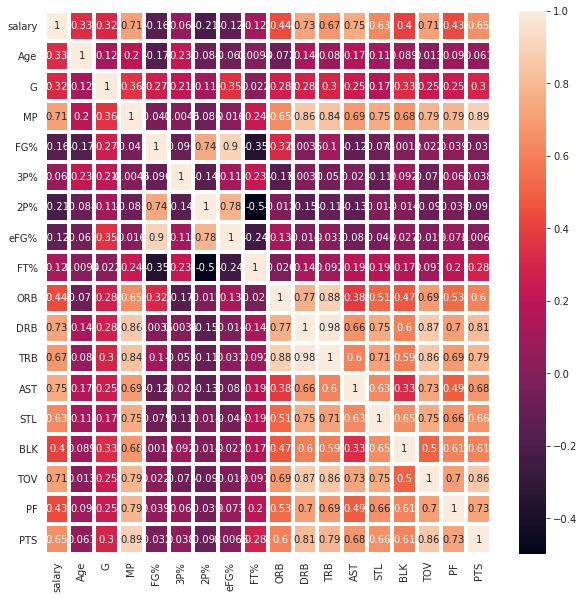

In [35]:
fig, ax = plt.subplots(figsize=(10,10))       
sns.heatmap(C.corr(), annot=True,linewidths=3,ax=ax)

## <3.1.1>. Use pairplot to check the positive relationship and scatter distribution between `Salary` and `AST, DRB, MP, TRB, PTS, STL`


**These data have a higher `positive correlation`. We can see from the images that they all show good positive correlation performance. For example, for players with more `AST`, they will have `higher salary` data.On the premise of positive correlation, the image still can not ensure obvious positive correlation scatter distribution. Only on the premise of high positive correlation can we ensure that the image shows an obvious positive correlation scatter distribution.**

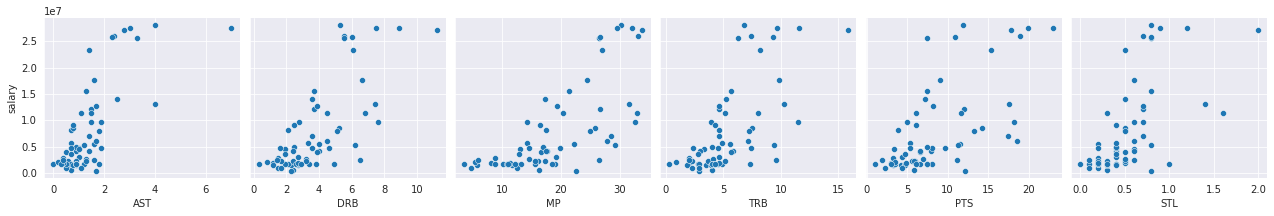

In [36]:
factor_related_c=C[['salary','AST','DRB','MP','TRB','PTS','STL']] # create a new dateframe called factor_related_c based on C dataframe
sns.pairplot(factor_related_c,x_vars=['AST','DRB','MP','TRB','PTS','STL'],y_vars=['salary'],height=3)

## <3.1.2>. Use OLS to analysis

**For the model I fitted, the R-squared is `0.812`, Adj. R-squared is `0.792`. The `higher` the `R-squared`, the stronger the interpretation ability of salary and the better the fitting degree. From this data, our model is fine to use. The `P>|t|` value usually indicates whether there is a `statistically significant relationship` between the term and the response. When the p value is less than `0.05`, it means that it is statistically `significant`. For our model `AST` and `DRB` lower than 0.05, I choose the lowest one `AST` to model the plot.**

In [37]:
factor_related_1=factor_related_c[['AST','DRB','MP','TRB','PTS','STL']] # create a new dateframe called factor_related_1 without the salary


model = sm.OLS(factor_related_c['salary'],factor_related_c[['AST','DRB','MP','TRB','PTS','STL']]) # make the model
results = model.fit() # run the OLS fit and get the results
print(results.summary() ) # print summary of the fit model

                                 OLS Regression Results                                
Dep. Variable:                 salary   R-squared (uncentered):                   0.812
Model:                            OLS   Adj. R-squared (uncentered):              0.792
Method:                 Least Squares   F-statistic:                              41.63
Date:                Wed, 08 Dec 2021   Prob (F-statistic):                    2.97e-19
Time:                        14:26:27   Log-Likelihood:                         -1076.0
No. Observations:                  64   AIC:                                      2164.
Df Residuals:                      58   BIC:                                      2177.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

**The following `four figures` respectively show the fitting plot(`plot the fitting of an independent variable to the dependent variable`), CCPR（`the influence of the independent variable on the dependent variable`), the partial regression plot(`viewing the influence of an independent variable on the dependent variable when controlling other independent variables`), and the residual plot.**

**I want to use the above methods to test the fitting degree of the `factors with significant positive correlation` with the model and their performance in the model. In general, I want to analyze the performance of the selected data and salary in the fitting model, and how is their fitting performance? Through `AST`, we can see that it has a good fit to the data.However, in the partial region plot, most of these scattered points are concentrated together, so ast does not perform well in this image**

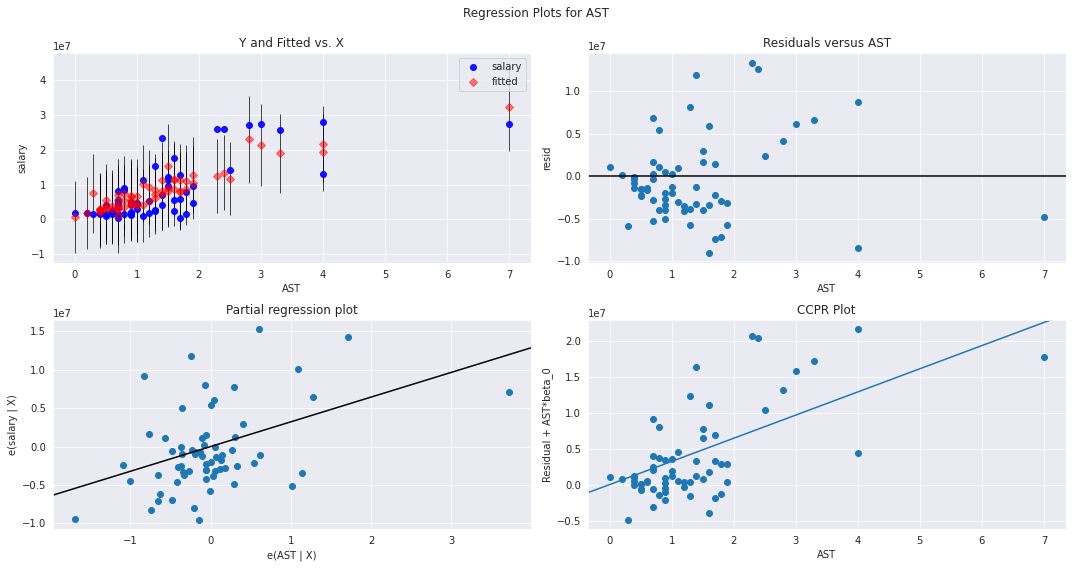

In [38]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(results, "AST", fig=fig) # show the plot and plot regression results against one regressor.

## <3.2>. Classified discussion of Positions PG

**From Positions C data, we can see the factor which is most positive related with salary is `PTS(0.6833), AST(0.6531),TOV(0.5994) MP(0.5965), Age(0.5913), DRB(0.5785) and 2P%(0.5778)`by using corr and heatmap.**

In [39]:
PG.corr()

,salary,Age,G,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
salary,1.000000,0.591310,-0.076793,0.596560,0.268041,-0.000344,0.577800,0.344459,0.290466,0.316180,0.578554,0.551085,0.653102,0.383171,0.401122,0.599442,0.396324,0.683361
Age,0.591310,1.000000,-0.189378,0.094294,0.083731,0.196446,0.249663,0.285625,0.361791,-0.096378,0.067213,0.037157,0.198574,-0.087091,-0.084984,0.087016,-0.033688,0.170499
G,-0.076793,-0.189378,1.000000,0.284523,0.289454,0.177650,-0.029801,0.280828,-0.213509,-0.028128,0.137918,0.118830,0.148813,0.219442,0.033226,0.071889,0.053101,0.064095
MP,0.596560,0.094294,0.284523,1.000000,0.328186,-0.011465,0.372348,0.318593,0.002153,0.650257,0.784643,0.784268,0.871944,0.670297,0.654632,0.860371,0.701087,0.870323
FG%,0.268041,0.083731,0.289454,0.328186,1.000000,0.273698,0.630400,0.746842,-0.059509,0.325779,0.372535,0.380605,0.339705,0.325589,0.195470,0.277702,0.049797,0.396575
3P%,-0.000344,0.196446,0.177650,-0.011465,0.273698,1.000000,-0.189214,0.683612,0.146307,-0.109929,-0.119270,-0.114573,-0.134817,-0.206800,-0.165631,-0.163963,-0.254518,0.047982
2P%,0.577800,0.249663,-0.029801,0.372348,0.630400,-0.189214,1.000000,0.473446,0.195934,0.299455,0.505645,0.487803,0.393958,0.316052,0.229317,0.440685,0.245768,0.540477
eFG%,0.344459,0.285625,0.280828,0.318593,0.746842,0.683612,0.473446,1.000000,0.095502,0.177385,0.275025,0.271805,0.220559,0.158929,0.088428,0.196396,-0.002507,0.422144
FT%,0.290466,0.361791,-0.213509,0.002153,-0.059509,0.146307,0.195934,0.095502,1.000000,-0.265592,-0.125055,-0.145602,-0.078974,-0.211124,-0.262949,-0.065736,-0.034592,0.150435
ORB,0.316180,-0.096378,-0.028128,0.650257,0.325779,-0.109929,0.299455,0.177385,-0.265592,1.000000,0.794966,0.849650,0.662731,0.565095,0.652472,0.697814,0.515876,0.568829


<AxesSubplot:>

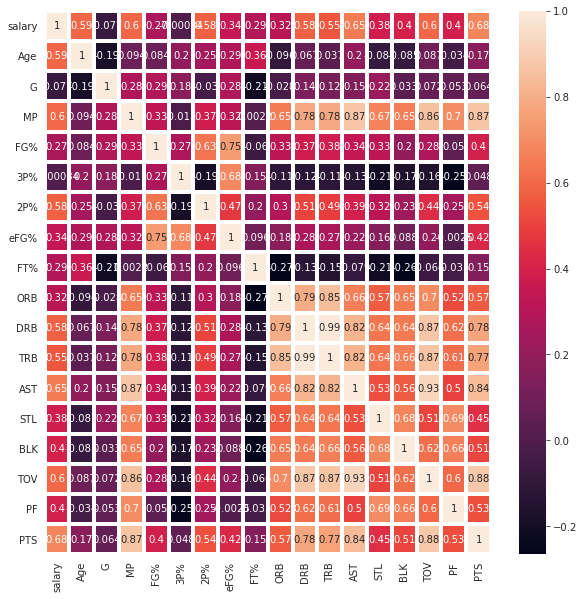

In [40]:
fig, ax = plt.subplots(figsize=(10,10))       
sns.heatmap(PG.corr(), annot=True,linewidths=3,ax=ax)

## <3.2.1>. Use pairplot to check the positive relationship and scatter distribution between `Salary `and `PTS, AST, TOV, MP, Age, DRB and 2P%`


**The scatter points of these graphs are `scattered`. Only the plots of `PTS` and `AST` were relatively obvious.**

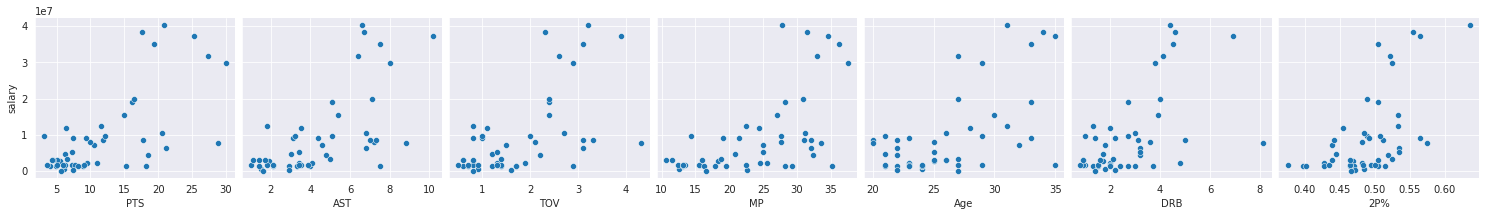

In [41]:
factor_related_pg=PG[['salary','PTS','AST','TOV','MP','Age','DRB','2P%']] # create a new dateframe called factor_related_pg with selected factors based on PG
sns.pairplot(factor_related_pg,x_vars=['PTS','AST','TOV','MP','Age','DRB','2P%'],y_vars=['salary'],height=3)

## <3.2.2>. Use OLS to analysis

`R-squared 0.773`. This shows that our model has a comparatively good fit. At the same time, `PTS and Age` have certain significance. I choose `PTS` to generate plot. We can see that it has good performance in fitting plot and shows obvious positive correlation scatter distribution in `CCRP`.

In [42]:
factor_related_2=factor_related_pg[['PTS','AST','TOV','MP','Age','DRB','2P%']] # create a new dateframe called factor_related_2 without the salary

model2 = sm.OLS(factor_related_pg['salary'],factor_related_2[['PTS','AST','TOV','MP','Age','DRB','2P%']])  # make the model Dep. Variable:salary
results2 = model2.fit() # get the fit results
print(results2.summary() )

                                 OLS Regression Results                                
Dep. Variable:                 salary   R-squared (uncentered):                   0.773
Model:                            OLS   Adj. R-squared (uncentered):              0.736
Method:                 Least Squares   F-statistic:                              20.49
Date:                Wed, 08 Dec 2021   Prob (F-statistic):                    1.16e-11
Time:                        14:26:34   Log-Likelihood:                         -840.25
No. Observations:                  49   AIC:                                      1695.
Df Residuals:                      42   BIC:                                      1708.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

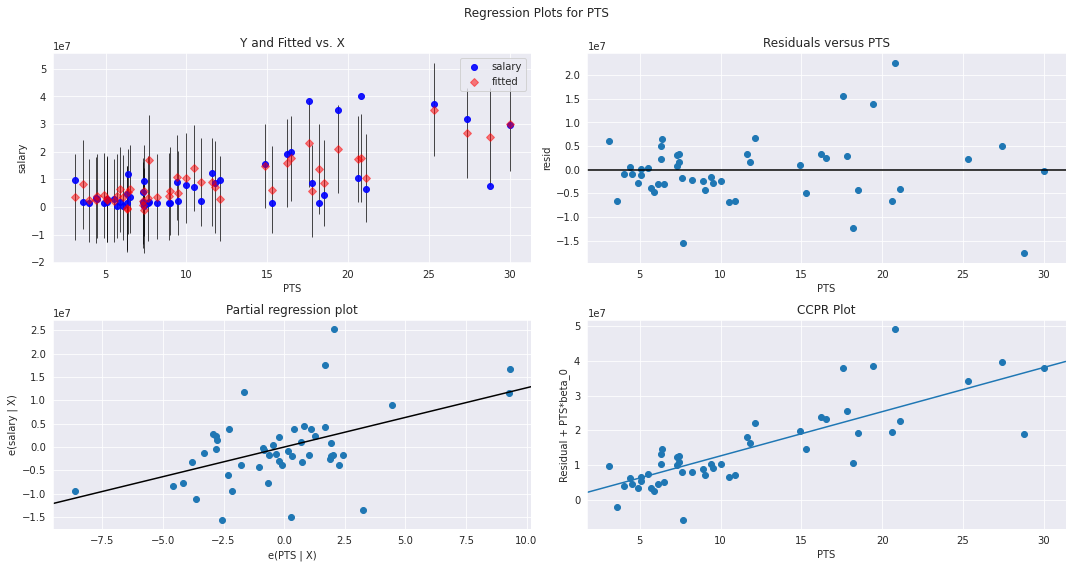

In [43]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(results2, "PTS", fig=fig)

## <3.3>. Classified discussion of Positions `PF`

**From Positions C data, we can see the factor which is most positive related with salary is `PTS(0.5866), AST(0.5764), MP(0.5462), TOV(0.5412) and DRB(0.5381)`by using corr and heatmap.**

In [44]:
PF.corr()

,salary,Age,G,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
salary,1.000000,0.316872,0.166903,0.546267,0.051259,0.188509,-0.025583,0.043071,0.119991,0.240771,0.538118,0.499506,0.576446,0.369906,0.249197,0.541260,0.254950,0.586616
Age,0.316872,1.000000,0.123112,0.116556,-0.259731,0.251669,-0.208576,-0.019882,0.315763,-0.168841,0.037728,-0.006842,0.103538,0.030706,-0.105240,0.055794,0.101369,0.026452
G,0.166903,0.123112,1.000000,0.550020,0.277798,0.530697,-0.003822,0.500286,0.423947,0.306833,0.440308,0.433222,0.381992,0.207493,0.181889,0.291814,0.416338,0.451943
MP,0.546267,0.116556,0.550020,1.000000,0.294265,0.361573,0.060499,0.317381,0.320751,0.594929,0.801803,0.798551,0.707141,0.689350,0.523356,0.778905,0.769441,0.864812
FG%,0.051259,-0.259731,0.277798,0.294265,1.000000,0.053188,0.759313,0.816718,-0.015182,0.533559,0.400822,0.455421,0.242916,0.293466,0.390341,0.302320,0.344574,0.428695
3P%,0.188509,0.251669,0.530697,0.361573,0.053188,1.000000,-0.276498,0.485644,0.510389,0.043752,0.237891,0.203788,0.093806,-0.003284,0.071247,0.106861,0.382586,0.292422
2P%,-0.025583,-0.208576,-0.003822,0.060499,0.759313,-0.276498,1.000000,0.566791,-0.210455,0.270923,0.157669,0.194346,0.050277,0.131714,0.206320,0.112542,0.119311,0.175183
eFG%,0.043071,-0.019882,0.500286,0.317381,0.816718,0.485644,0.566791,1.000000,0.253924,0.299955,0.332521,0.344068,0.177826,0.135945,0.249215,0.190025,0.377813,0.373574
FT%,0.119991,0.315763,0.423947,0.320751,-0.015182,0.510389,-0.210455,0.253924,1.000000,0.011319,0.158627,0.128552,0.109354,0.038145,0.090238,0.119209,0.265663,0.267380
ORB,0.240771,-0.168841,0.306833,0.594929,0.533559,0.043752,0.270923,0.299955,0.011319,1.000000,0.695302,0.810971,0.406930,0.579904,0.655951,0.539877,0.597034,0.607569


<AxesSubplot:>

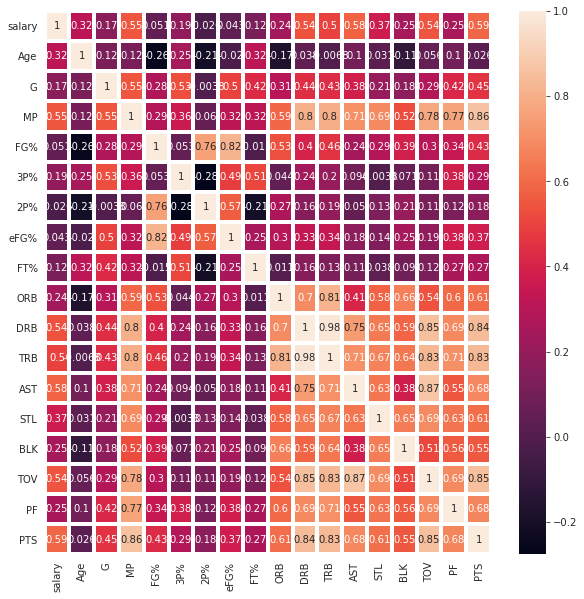

In [45]:
fig, ax = plt.subplots(figsize=(10,10))       
sns.heatmap(PF.corr(), annot=True,linewidths=3,ax=ax)

## <3.3.1>. Use pairplot to check the positive relationship and scatter distribution between `Salary `and `PTS, AST, MP, TOV and DRB`


**Due to the influence of `correlation degree`, I think the `scatter distribution` of these `five` plots can not show a positive correlation scatter distribution very obviously**

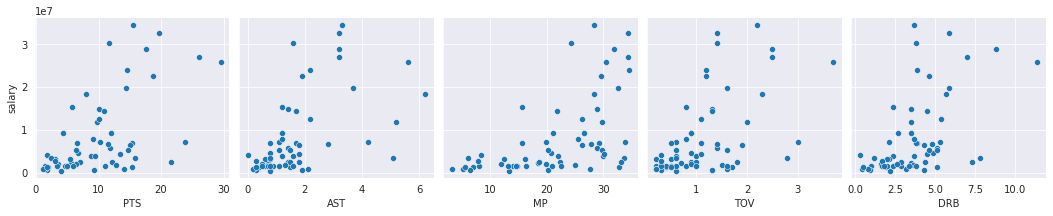

In [46]:
factor_related_pf=PF[['salary','PTS','AST','MP','TOV','DRB']] # Create a new date frame called factor_related_pf with selected factors based on PF
sns.pairplot(factor_related_pf,x_vars=['PTS','AST','MP','TOV','DRB'],y_vars=['salary'],height=3)

## <3.3.2>. Use OLS to analysis 

`R-squared：0.679`. This is a medium level of fit. Since the value of` R-squared` is not high, we can see from the fitted plot that the data quasi consolidation does not perform very well. But in `CCPR plot`, I think `PTS` has a relatively good performance.

In [47]:
factor_related_3=factor_related_pf[['PTS','AST','MP','TOV','DRB']]  # create a new data frame without salary called factor_related_3 based on factor_related_pf 

model3 = sm.OLS(factor_related_pf['salary'],factor_related_3[['PTS','AST','MP','TOV','DRB']])  # make the model Dep. Variable:salary
results3 = model3.fit() # get the fit results
print(results3.summary() )

                                 OLS Regression Results                                
Dep. Variable:                 salary   R-squared (uncentered):                   0.679
Model:                            OLS   Adj. R-squared (uncentered):              0.651
Method:                 Least Squares   F-statistic:                              24.17
Date:                Wed, 08 Dec 2021   Prob (F-statistic):                    5.79e-13
Time:                        14:26:40   Log-Likelihood:                         -1063.8
No. Observations:                  62   AIC:                                      2138.
Df Residuals:                      57   BIC:                                      2148.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

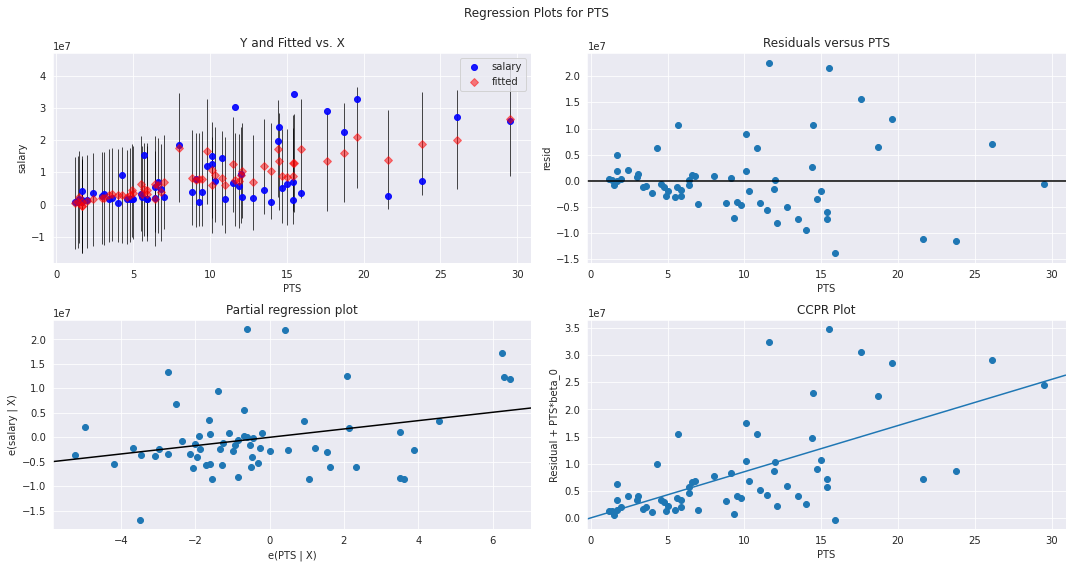

In [48]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(results3, "PTS", fig=fig)

## <3.4>. Classified discussion of Positions `SF`

**From Positions C data, we can see the factor which is most positive related with salary is `AST(0.8385), TOV(0.7799), PTS(0.7597), DRB(0.6372), TRB(0.6232) and MP(0.5929)`by using corr and heatmap.**

In [49]:
SF.corr()

,salary,Age,G,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
salary,1.000000,0.474007,0.166657,0.592997,0.165395,0.056177,0.013343,0.060248,0.353229,0.331505,0.637222,0.623263,0.838552,0.501053,0.291664,0.779952,0.205190,0.759756
Age,0.474007,1.000000,-0.021923,0.202764,-0.051878,0.042071,-0.040967,0.130788,0.068213,0.058897,0.204143,0.188357,0.338141,0.113396,0.284151,0.214105,-0.076760,0.235619
G,0.166657,-0.021923,1.000000,0.589442,0.270863,0.145311,0.330857,0.303110,0.265048,0.260310,0.479614,0.469573,0.396664,0.353587,0.200331,0.426071,0.481449,0.463855
MP,0.592997,0.202764,0.589442,1.000000,0.305695,0.333267,0.189916,0.333029,0.508461,0.480476,0.790805,0.782905,0.705981,0.708330,0.325940,0.766916,0.736620,0.817131
FG%,0.165395,-0.051878,0.270863,0.305695,1.000000,0.393939,0.659432,0.802642,0.029243,0.300498,0.333413,0.347142,0.256179,0.315553,0.217033,0.313382,0.328013,0.371516
3P%,0.056177,0.042071,0.145311,0.333267,0.393939,1.000000,-0.044464,0.725791,0.404921,-0.088060,0.248356,0.192611,0.073093,0.173677,0.066515,0.185161,0.288603,0.303607
2P%,0.013343,-0.040967,0.330857,0.189916,0.659432,-0.044464,1.000000,0.499224,-0.265719,0.276807,0.171235,0.203416,0.055489,0.163727,0.257689,0.078281,0.335857,0.098034
eFG%,0.060248,0.130788,0.303110,0.333029,0.802642,0.725791,0.499224,1.000000,0.174711,0.057563,0.273643,0.244071,0.110185,0.217436,0.180698,0.203108,0.353817,0.312123
FT%,0.353229,0.068213,0.265048,0.508461,0.029243,0.404921,-0.265719,0.174711,1.000000,0.164911,0.418513,0.399480,0.369465,0.297680,-0.082901,0.420028,0.302146,0.509797
ORB,0.331505,0.058897,0.260310,0.480476,0.300498,-0.088060,0.276807,0.057563,0.164911,1.000000,0.572380,0.699173,0.415618,0.558770,0.388618,0.319783,0.391540,0.313382


<AxesSubplot:>

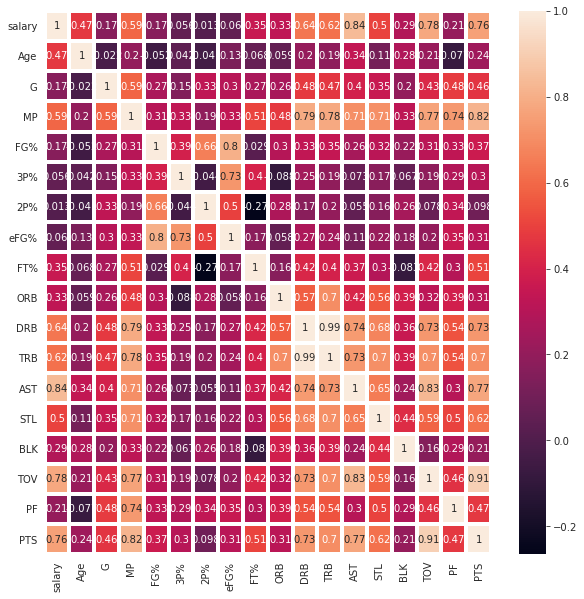

In [50]:
fig, ax = plt.subplots(figsize=(10,10))       
sns.heatmap(SF.corr(), annot=True,linewidths=3,ax=ax)

## <3.4.1>. Use pairplot to check the positive relationship and scatter distribution between `Salary `and` AST, TOV, PTS, DRB, TRB and MP`

**Due to the influence of correlation, `AST, TOV and PTS` have more `obvious positive correlation` scatter distribution. For `DRB, TRB and MP,` the `distribution of scatter` seems not so obvious.**

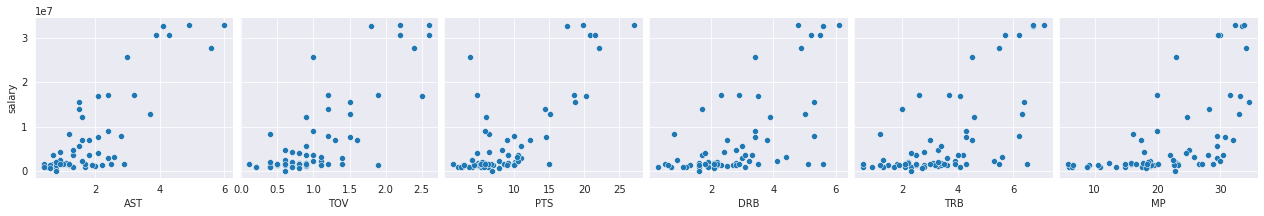

In [51]:
factor_related_sf=SF[['salary','AST','TOV','PTS','DRB','TRB','MP']] # create a new dataframe with selected factors based on SF
sns.pairplot(factor_related_sf,x_vars=['AST','TOV','PTS','DRB','TRB','MP'],y_vars=['salary'],height=3)

## <3.4.2>. Use OLS to analysis 

**R-squared：0.838. Among the five models, this is the best fitting model. At the same time, there are three `P > | t |` less than `0.05` (`AST, PTS, MP`) in this model, indicating that they are significant. I choose `AST` to plot. From the figure, we can see that AST has excellent performance in four different types of graphs. It shows a good and obvious `positive correlation` in `partial region and CCPR`. Finally, it also has a `good fit` in the fitting plot.**

In [52]:
factor_related_4=factor_related_sf[['AST','TOV','PTS','DRB','TRB','MP']] # create a new dataframe without salary based on factor_related_sf

model4 = sm.OLS(factor_related_sf['salary'],factor_related_4[['AST','TOV','PTS','DRB','TRB','MP']])  # make the model Dep. Variable:salary
results4 = model4.fit() # get fit result
print(results4.summary() )

                                 OLS Regression Results                                
Dep. Variable:                 salary   R-squared (uncentered):                   0.838
Model:                            OLS   Adj. R-squared (uncentered):              0.822
Method:                 Least Squares   F-statistic:                              51.75
Date:                Wed, 08 Dec 2021   Prob (F-statistic):                    6.73e-22
Time:                        14:26:47   Log-Likelihood:                         -1106.7
No. Observations:                  66   AIC:                                      2225.
Df Residuals:                      60   BIC:                                      2238.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

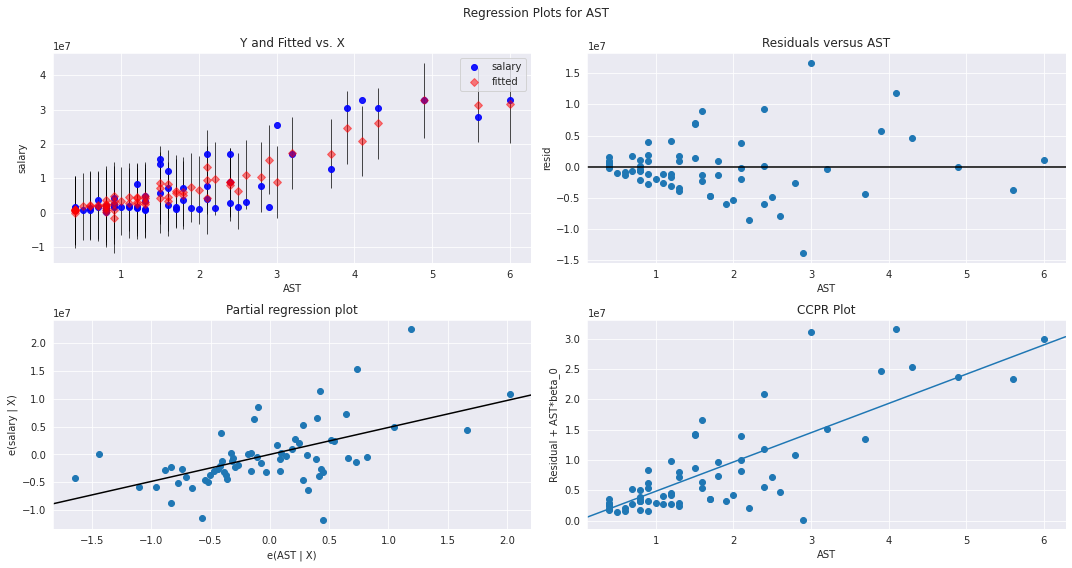

In [53]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(results4, "AST", fig=fig)

## <3.5>. Classified discussion of Positions `SG`

**From Positions C data, we can see the factor which is most positive related with salary is `PTS(0.6551), AST(0.6529), TOV(0.6229) and MP(0.5508)`by using corr and heatmap.**

In [54]:
SG.corr()

,salary,Age,G,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
salary,1.000000,0.376276,0.232085,0.550874,0.183159,0.153181,0.083442,0.174008,0.090905,0.257279,0.416976,0.404096,0.652931,0.446418,0.474605,0.622919,0.432063,0.655141
Age,0.376276,1.000000,0.164613,0.095178,0.145607,0.358578,-0.024011,0.371980,0.037639,0.026260,0.039084,0.035401,0.035977,0.129847,0.042263,-0.064342,0.071123,0.068547
G,0.232085,0.164613,1.000000,0.595702,0.235710,0.284670,0.048491,0.268127,0.037681,0.482818,0.508740,0.536260,0.343074,0.332751,0.351015,0.358596,0.449771,0.482464
MP,0.550874,0.095178,0.595702,1.000000,0.378671,0.354913,0.061644,0.312566,0.182841,0.573053,0.825143,0.822123,0.791735,0.669090,0.506639,0.790024,0.819721,0.883252
FG%,0.183159,0.145607,0.235710,0.378671,1.000000,0.497349,0.643254,0.828267,0.046877,0.343725,0.372232,0.393483,0.271540,0.396888,0.358250,0.291334,0.396138,0.392563
3P%,0.153181,0.358578,0.284670,0.354913,0.497349,1.000000,-0.187471,0.787702,-0.062887,0.060078,0.262319,0.233137,0.208218,0.215334,0.085494,0.173437,0.321332,0.317041
2P%,0.083442,-0.024011,0.048491,0.061644,0.643254,-0.187471,1.000000,0.408627,0.219177,0.209168,0.118898,0.151975,0.054829,0.147502,0.234341,0.080361,0.093170,0.120367
eFG%,0.174008,0.371980,0.268127,0.312566,0.828267,0.787702,0.408627,1.000000,0.056322,0.103101,0.248854,0.234393,0.163905,0.220419,0.154139,0.143616,0.300122,0.304062
FT%,0.090905,0.037639,0.037681,0.182841,0.046877,-0.062887,0.219177,0.056322,1.000000,-0.138253,0.123315,0.076802,0.237494,-0.133846,-0.068635,0.169496,0.099227,0.250430
ORB,0.257279,0.026260,0.482818,0.573053,0.343725,0.060078,0.209168,0.103101,-0.138253,1.000000,0.631342,0.757304,0.481730,0.716769,0.703753,0.553800,0.595780,0.508591


<AxesSubplot:>

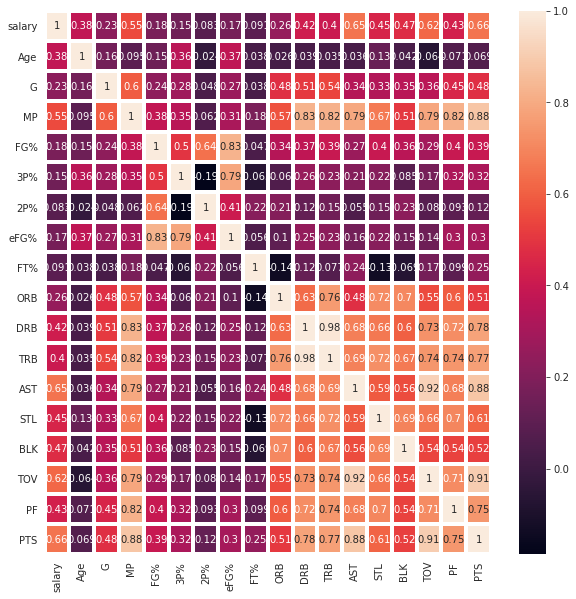

In [55]:
fig, ax = plt.subplots(figsize=(10,10))       
sns.heatmap(SG.corr(), annot=True,linewidths=3,ax=ax)

## <3.5.1>. Use pairplot to check the positive relationship and scatter distribution between `Salary `and` PTS, AST, TOV and MP`

**From the following four figures, due to the correlation, we can see that the relationship between `independent variables` and `dependent variables` is not obvious, especially `MP` plot.**

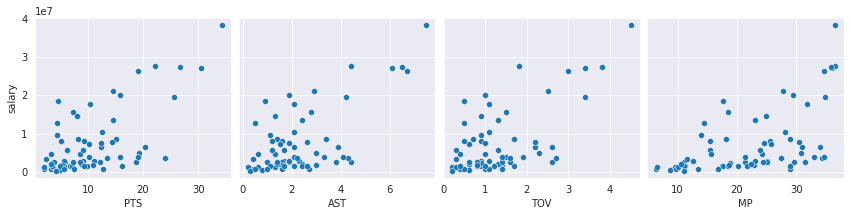

In [56]:
factor_related_sg=SG[['salary','PTS','AST','TOV','MP']] #creare a new data frame based on SG with selected factors
sns.pairplot(factor_related_sg,x_vars=['PTS','AST','TOV','MP'],y_vars=['salary'],height=3)

## <3.5.2>. Use OLS to analysis 

**R-squared:`0.698 `is a Medium level value. It shows that the factor combination of the model is not very good fitted. There is no P value lower than the 0.05, so I choose the `0.056 PTS` to fit the model.Finally, on the image, we can also see that the fitting degree is not very good, and most of the fitting deviates from our data to a certain extent.**

In [57]:
factor_related_5=factor_related_sg[['PTS','AST','TOV','MP']] #creare a new data frame without salary based on factor_related_sg

model5 = sm.OLS(factor_related_sg['salary'],factor_related_5[['PTS','AST','TOV','MP']]) # make the model Dep. Variable:salary 
results5 = model5.fit()
print(results5.summary() )

                                 OLS Regression Results                                
Dep. Variable:                 salary   R-squared (uncentered):                   0.698
Model:                            OLS   Adj. R-squared (uncentered):              0.679
Method:                 Least Squares   F-statistic:                              36.93
Date:                Wed, 08 Dec 2021   Prob (F-statistic):                    5.51e-16
Time:                        14:26:51   Log-Likelihood:                         -1158.0
No. Observations:                  68   AIC:                                      2324.
Df Residuals:                      64   BIC:                                      2333.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

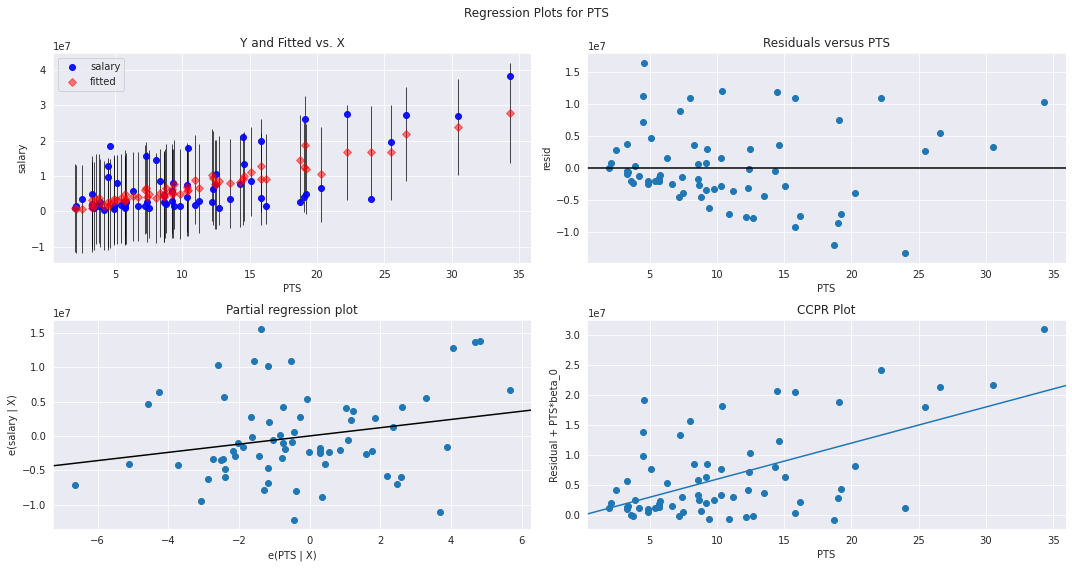

In [58]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(results5, "PTS", fig=fig)

## <4>. Summary

In Overall data, PTS(0.6577), TOV(0.6198), AST(0.5969) and MP(0.5824)

In C, AST(0.7497), DRB(0.7279), MP(0.7122), TRB(0.6737), PTS(0.6527) and STL(0.6291)

In SG, PTS(0.6551), AST(0.6529), TOV(0.6229) and MP(0.5508)

In SF, AST(0.8385), TOV(0.7799), PTS(0.7597), DRB(0.6372), TRB(0.6232) and MP(0.5929)

In PF, PTS(0.5866), AST(0.5764), MP(0.5462), TOV(0.5412) and DRB(0.5381)

In PG, PTS(0.6833), AST(0.6531),TOV(0.5994) MP(0.5965), Age(0.5913), DRB(0.5785) and 2P%(0.5778)

Finally, we can see that PTS is very important for players in all positions, and has a most extensive impact on the salary of NBA players. it has the greatest impact on SG, PF and PG, and also has a good effects on the other two positions.In different team positions, DRB and AST are the two most important factors for the Center, and AST and TOV are the two most important factors for SF. 


At first, I thought that efficiency and shooting rate are also very important to players, but after analysis, I can find that they are less important than other factors, which also shows that my assumption is not completely correct.

# Reference

1. Basketball Glossary https://www.basketball-reference.com/about/glossary.html

2. Data salary https://www.kaggle.com/junfenglim/nba-player-salaries-201920

3. Data stats https://www.basketball-reference.com/leagues/NBA_2020_per_game.html